# Lasso Regression Analysis

## Setup

In [13]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [14]:
# Load data
data = pd.read_csv('data/ames_lasso.csv')

In [15]:
# Create the independent variables and the target
predictors = data.drop('SalePrice', axis=1)
target = data['SalePrice']

In [16]:
# Check the columns in predictors
column_names = predictors.columns.tolist()
for column in column_names:
    print(column)

GrLivArea
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
ExterQual
ExterCond
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
YearsSinceBuilt
YearsSinceRemod
Crisis
MSZoning_C (all)
MSZoning_FV
MSZoning_I (all)
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
Alley_None
Alley_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSewr
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_Greens
Neighborhood_GrnHill
Neighborhood_IDOTRR
Neighborhood_Landmrk
Neighborhood_MeadowV
Ne

In [17]:
# View data
predictors.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,856,0.0,7890,6,6,0.0,3,3,238.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,1049,42.0,4235,5,5,149.0,4,3,552.0,393.0,...,0,0,0,0,0,0,0,0,0,0
2,1001,60.0,6060,5,9,0.0,4,3,737.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,1039,80.0,8146,4,8,0.0,4,4,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,1665,70.0,8400,8,6,0.0,4,3,643.0,0.0,...,0,0,0,0,1,0,0,0,0,0


## Split Data into Train-Test Sets

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = .2, random_state=0)

In [19]:
# Check training set features
X_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
1138,1792,80.0,12435,7,5,172.0,4,3,361.0,0.0,...,0,0,0,0,1,0,0,0,0,0
411,864,0.0,8499,5,6,0.0,3,3,660.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2301,1595,60.0,7200,6,8,0.0,3,5,338.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1697,1692,0.0,9337,7,5,0.0,3,3,353.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1347,1720,65.0,10816,9,5,364.0,5,3,1104.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Check training set target
y_train.head()

1138    231500
411     141000
2301    155500
1697    191000
1347    332000
Name: SalePrice, dtype: int64

## Data Prep and Feature Selection

In [21]:
# Scale the Train Set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convert the scaled features back into a dataframe
df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Assign the scaled features to X_train
X_train = df

# Check the scaled features
X_train.head()

In [22]:
# Scale the Test Set
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Convert the scaled features back into a dataframe
df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Assign the scaled features to X_train
X_test = df

# Check the scaled features
X_test.head()

## Lasso

### Train Model

In [49]:
# Initialize the Lasso model
lasso = Lasso(max_iter = 10000, random_state=0)

In [50]:
# Define the hyperparameter grid
params = {'alpha': np.logspace(-4, 0, 50)}

In [51]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(lasso, params, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True, verbose=1)

In [52]:
# Fit the model to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/georgeho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+11, tolerance: 8.927e+08
  model = cd_fast.enet_coordinate_descent(
/Users/georgeho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e+11, tolerance: 8.453e+08
  model = cd_fast.enet_coordinate_descent(
/Users/georgeho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

KeyboardInterrupt: 

In [37]:
# Get the best model and hyperparameters
best_lasso_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [38]:
# Print best hyperparameters
print("Best hyperparameters:", best_params)

Best hyperparameters: {'alpha': 1.0}


### Evaluate Model

In [39]:
# Training set predictions

# Predict on training set
y_train_pred = best_lasso_model.predict(X_train)

# Calculate and print training set R2
r2_train = r2_score(y_train, y_train_pred)
print("Training set R2:", r2_train)

Training set R2: 0.9481375180951115


In [40]:
# Testing set predictions

# Predict on test set
y_test_pred = best_lasso_model.predict(X_test)

# Calculate and print testing set R2
r2_test = r2_score(y_test, y_test_pred)
print("Testing set R2:", r2_test)

Testing set R2: 0.9144673378958135


## LassoCV

### Train Model

In [28]:
# Initialize the Lasso model with cross-validation
alphas = np.logspace(-4, 1, 20)
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=0) 

In [29]:
# Fit the model
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01]),
        cv=5, max_iter=10000, random_state=0)

In [30]:
# Print the Optimal Value of Alpha
print('Optimal alpha:', lasso_cv.alpha_)

Optimal alpha: 10.0


### Evaluate Model

In [31]:
# Training set predictions

# Predict on training set
y_train_pred = lasso_cv.predict(X_train)

# Calculate and print training set R2
r2_train = r2_score(y_train, y_train_pred)
print("Training set R2:", r2_train)

Training set R2: 0.9479801290961217


In [32]:
# Testing set predictions

# Predict on test set
y_test_pred = lasso_cv.predict(X_test)

# Calculate and print testing set R2
r2_test = r2_score(y_test, y_test_pred)
print("Testing set R2:", r2_test)

Testing set R2: 0.9156671848987641


### Intercepts and Slopes

In [41]:
# Print the Intercept
print('Intercept:', lasso_cv.intercept_)

Intercept: 176534.20728155348


In [42]:
# Print the Slopes
lassoCoef = pd.Series(lasso_cv.coef_, index=predictors.columns)
print('Slopes:', lasso_cv.coef_)

Slopes: [ 2.53333134e+04  6.98008579e+02  5.59890043e+03  8.56741428e+03
  7.10110110e+03  4.44665275e+03  2.25840968e+03 -5.01268788e+02
  7.38337451e+03  3.03330779e+03 -0.00000000e+00  7.85907279e+03
  0.00000000e+00  2.47838279e+03 -9.62889263e+02  9.61907633e+02
  2.09971516e+01  9.75266267e+02  7.64440123e+02 -2.99783408e+03
 -1.37114391e+03  5.53257744e+02  3.90091943e+03  6.99530283e+03
  2.80743092e+03  2.84529664e+03  1.59683753e+03  4.43518964e+02
  5.05840539e+02  4.32552466e+02  1.86617413e+03 -8.82458969e+03
  4.44864852e+02 -4.23036875e+02  1.08451775e+03 -1.20301922e+04
 -7.48105953e+02 -1.43548285e+03 -1.28027293e+03 -0.00000000e+00
  4.18812489e+02  1.67147910e+02  1.26628764e+03 -2.03502699e+03
  1.17598155e+03  4.97592461e+02 -2.88634180e+02  1.11684280e+03
 -3.79425886e+02 -7.76617523e+01  1.12750754e+03 -2.93847750e+02
  7.18253577e+02 -4.62607572e+02  1.25335441e+03 -6.27466124e+02
 -5.01245976e+02  5.06408899e+02  7.80513399e+02 -2.32253391e+03
  8.29190810e+02 

## Feature Importances from LassoCV

In [43]:
# Find the top 5 features
feature_importances = lassoCoef[lassoCoef > 0].sort_values(ascending=False)
feature_importances.head(5)

GrLivArea        25333.313422
GarageCond_TA    11754.837733
OverallQual       8567.414276
TotalBsmtSF       7859.072792
BsmtFinSF1        7383.374505
dtype: float64

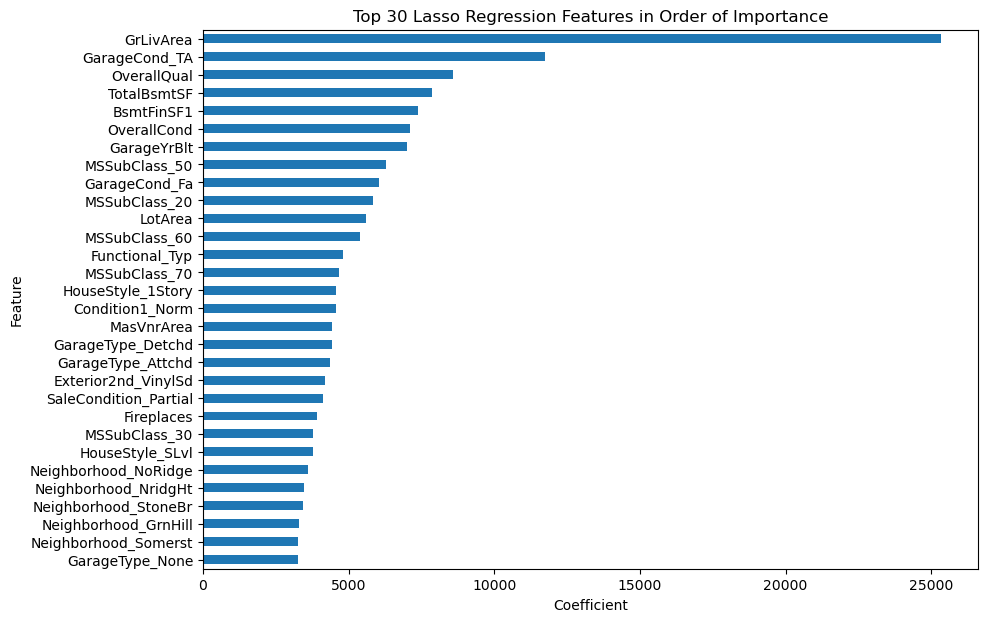

In [44]:
# Get the top 30 features
feature_importances_top_30 = feature_importances.head(30)

# Create a bar chart
feature_importances_top_30.sort_values().plot(kind='barh', figsize=(10, 7))

# Labels and titles
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 30 Lasso Regression Features in Order of Importance')

# Show the plot
plt.show()

In [45]:
# Get the features with coefficients of 0
features_zeroes = lassoCoef[lassoCoef == 0]
print(features_zeroes.index.tolist())
print('Number of features with coefficients of 0:', len(features_zeroes))

['BsmtUnfSF', '1stFlrSF', 'MSZoning_FV', 'Condition2_RRAe', 'Condition2_RRAn', 'BldgType_Duplex', 'Exterior1st_CemntBd', 'BsmtCond_Fa', 'BsmtFinType2_Unf', 'Heating_GasW', 'GarageFinish_None', 'GarageQual_None', 'GarageCond_None', 'MiscFeature_Shed', 'MSSubClass_80']
Number of features with coefficients of 0: 15
